In [1]:
import numpy as np
import sys
import pickle
import pathlib
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from slime import lime_tabular

from os.path import join
path_to_file = str(pathlib.Path().resolve())
dir_path = join(path_to_file, "../../")
sys.path.append(join(dir_path, "HelperFiles"))
from helper import *
from load_data import *

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
breast_cancer = load_breast_cancer()
colnames = breast_cancer.feature_names

Load top-K rankings from many iterations of LIME and our adjustment of S-LIME on an unstable point. Computed in Experiments/Code/lime_vs_slime.py

In [3]:
fname = "lime_vs_slime"
with open(join(dir_path, "Experiments", "Results", fname), "rb") as fp:
        top_Ks = pickle.load(fp)
top_K_lime, top_K_slime = np.array(top_Ks[0]), np.array(top_Ks[1])

In [4]:
###### Get frequencies of top-5 lime and S-LIME features
cols_lime = []
freqs_lime = []
K = 5
for k in range(K):
    most_common = np.argmax(np.bincount(top_K_lime[:,k]))
    cols_lime.append(colnames[most_common])
    print(most_common) # Verify they're unique
    freqs_lime.append(np.mean(top_K_lime[:,k]==most_common))
print(freqs_lime)

cols_slime = []
freqs_slime = []
for k in range(K):
    most_common = np.argmax(np.bincount(top_K_slime[:,k]))
    cols_slime.append(colnames[most_common])
    print(most_common) # Verify they're unique
    freqs_slime.append(np.mean(top_K_slime[:,k]==most_common))

print(freqs_slime)



21
27
6
26
22
[0.815, 0.815, 0.965, 0.545, 0.41]
21
27
6
26
22
[1.0, 1.0, 1.0, 1.0, 0.96]


## Combine the two

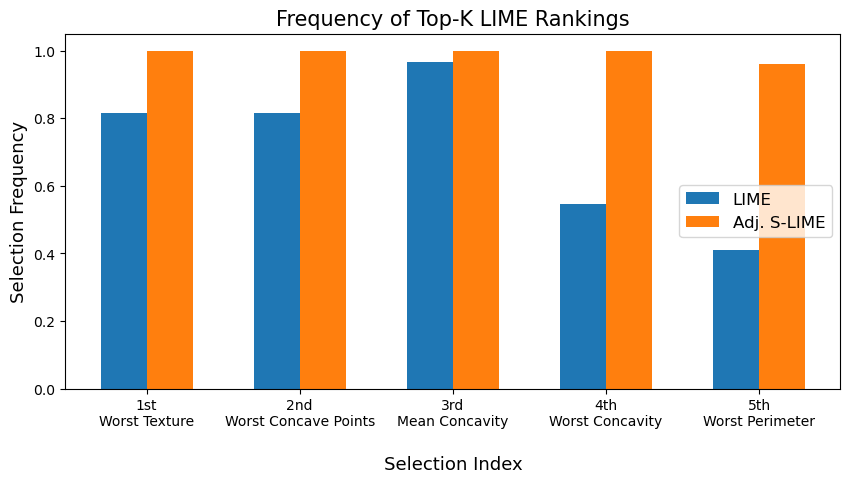

In [7]:
plt.figure(figsize=(10,5))
width = 0.3       

# Plotting
onetoK = np.arange(K)+1
plt.bar(onetoK, freqs_lime , width, label='LIME')
plt.bar(onetoK + width, freqs_slime, width, label='Adj. S-LIME')

plt.xlabel('\nSelection Index', size=13)
plt.ylabel('Selection Frequency', size=13)
plt.title('Frequency of Top-K LIME Rankings', size=15)

order = ["1st", "2nd", "3rd", "4th", "5th"]
order2 = [order[i] + '\n' + cols_slime[i].title() for i in range(K)]
plt.xticks(onetoK + width / 2, order2)

# Finding the best position for legends and putting it
plt.legend(loc='center right', prop={'size': 12})
plt.subplots_adjust(bottom=0.17)

plt.savefig(join(dir_path, "Experiments", "Figures", "lime_instability.png"), bbox_inches="tight")
plt.show()


Calculate LIME FWERs

In [6]:
with open(join(dir_path, "Experiments/Results/lime_ranks_K2"), "rb") as fp:
    lime_ranks2 = pickle.load(fp)
with open(join(dir_path, "Experiments/Results/lime_ranks_K5"), "rb") as fp:
    lime_ranks5 = pickle.load(fp)

lime_fwers2 = np.array([calc_fwer(ranks, Round=False) for ranks in lime_ranks2])
lime_fwers5 = np.array([calc_fwer(ranks, Round=False) for ranks in lime_ranks5])

print(np.sum(lime_fwers2 > 0))
print(np.sum(lime_fwers2 > 0.05))
print(np.sum(lime_fwers2 > 0.1))

print(np.sum(lime_fwers5 > 0))
print(np.sum(lime_fwers5 > 0.05))
print(np.sum(lime_fwers5 > 0.1))

with open(join(dir_path, "Experiments/Results/lime_fwers_K2"), "wb") as fp:
    pickle.dump(lime_fwers2, fp)
with open(join(dir_path, "Experiments/Results/lime_fwers_K5"), "wb") as fp:
    pickle.dump(lime_fwers5, fp)

8
0
0
12
0
0
